In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [2]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
sample_sub = pd.read_csv('datasets/sample_submission.csv')

In [3]:
data_all = pd.concat([train_data, test_data], ignore_index = True, sort = False)

In [4]:
print(data_all.shape, train_data.shape, test_data.shape)

(151924, 29) (116058, 29) (35866, 28)


In [5]:
data_all.head(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1.0
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1.0
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1.0
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1.0
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,46.0,675.0,C86,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1.0
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,44.0,723.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,45.0,652.0,A23,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,35.0,808.0,C86,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,2,0,1,1.0
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,41.0,702.0,A23,30.0,700.0,0.0,0,0,0,0,0,1,1,1,1,1,2,2,1.0


In [6]:
data_all.tail(10)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
151914,35857,X,OTHER,4.250,240000,360,01/01/12,Mar-12,73,2.0,38.0,803.0,C86,0.0,799.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151915,35858,X,Browning-Hart,4.000,304000,360,01/02/12,May-12,80,1.0,22.0,776.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151916,35859,X,Browning-Hart,4.125,79000,180,01/02/12,Apr-12,64,1.0,44.0,764.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151917,35860,X,OTHER,4.000,237000,360,01/01/12,Mar-12,64,1.0,45.0,698.0,B12,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,NaN
151918,35861,Y,Browning-Hart,3.250,226000,180,01/02/12,Apr-12,80,2.0,24.0,791.0,A23,0.0,781.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151919,35862,X,OTHER,4.125,232000,240,01/01/12,Apr-12,80,2.0,30.0,684.0,C86,0.0,712.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151920,35863,Z,Edwards-Hoffman,3.375,204000,180,01/01/12,Mar-12,80,1.0,30.0,812.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151921,35864,X,Browning-Hart,4.250,200000,360,01/02/12,Apr-12,52,2.0,38.0,624.0,B12,0.0,646.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,NaN
151922,35865,Y,Edwards-Hoffman,4.375,400000,360,01/02/12,Apr-12,66,1.0,34.0,753.0,A23,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
151923,35866,X,OTHER,4.375,182000,360,01/02/12,Apr-12,70,1.0,3.0,0.0,C86,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [7]:
data_all.sample(5)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
20940,582777237244,X,OTHER,3.250,85000,180,2012-02-01,04/2012,61,2.0,19.0,755.0,B12,0.0,796.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
49286,413724214849,Y,Browning-Hart,4.125,417000,360,2012-02-01,04/2012,50,2.0,45.0,779.0,A23,0.0,766.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
82208,215651239103,X,OTHER,3.000,70000,82,2012-02-01,04/2012,53,2.0,16.0,798.0,B12,0.0,772.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
79271,492888605949,Z,"Miller, Mcclure and Allen",3.875,319000,360,2012-02-01,04/2012,85,2.0,31.0,765.0,B12,12.0,762.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
64080,156273858168,X,OTHER,3.000,201000,180,2012-03-01,05/2012,80,2.0,19.0,813.0,A23,0.0,813.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [8]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151924 entries, 0 to 151923
Data columns (total 29 columns):
loan_id                     151924 non-null int64
source                      151924 non-null object
financial_institution       151924 non-null object
interest_rate               151924 non-null float64
unpaid_principal_bal        151924 non-null int64
loan_term                   151924 non-null int64
origination_date            151924 non-null object
first_payment_date          151924 non-null object
loan_to_value               151924 non-null int64
number_of_borrowers         151924 non-null float64
debt_to_income_ratio        151924 non-null float64
borrower_credit_score       151924 non-null float64
loan_purpose                151924 non-null object
insurance_percent           151924 non-null float64
co-borrower_credit_score    151924 non-null float64
insurance_type              151924 non-null float64
m1                          151924 non-null int64
m2                  

In [9]:
# save the loan_id column
train_id = train_data['loan_id']
test_id = test_data['loan_id']

# Now drop the loan_id column since it's unnecessary for the prediction process
train_data.drop('loan_id', axis =1, inplace = True)
test_data.drop('loan_id', axis =1, inplace = True)

data_all = pd.concat([train_data, test_data], ignore_index = True, sort = False)
print(train_data.shape, test_data.shape, data_all.shape)

(116058, 28) (35866, 27) (151924, 28)


In [10]:
train_data['m13'].describe()

count    116058.000000
mean          0.005480
std           0.073824
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: m13, dtype: float64

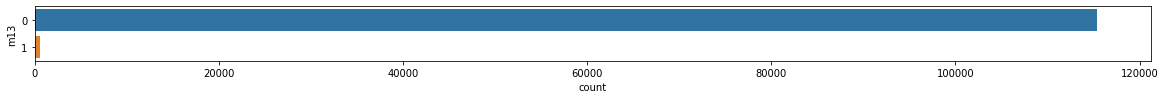

In [12]:
fig=plt.figure(figsize=(20,1))
sns.countplot(y='m13', data=train_data);

In [29]:
cat_cols=data_all.select_dtypes(include=['object'])
num_cols=data_all.select_dtypes(include=['int64', 'float64'])

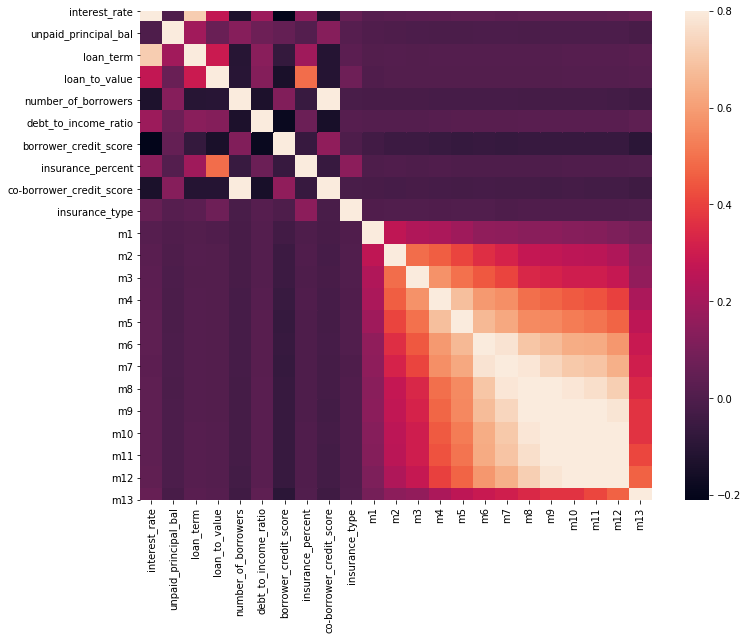

In [14]:
# correlation Matrix Heatmap
corrmat=train_data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

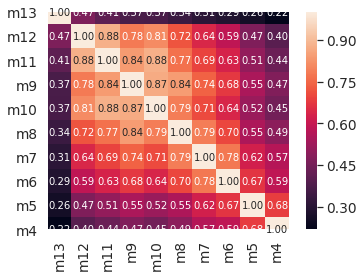

In [19]:
# top 10 heatmaps
k = 10
cols = corrmat.nlargest(k, 'm13')['m13'].index
cm=np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [20]:
most_corr=pd.DataFrame(cols)
most_corr.columns = ['Most correlated Features']
most_corr

,Most correlated Features
0,m13
1,m12
2,m11
3,m9
4,m10
5,m8
6,m7
7,m6
8,m5
9,m4


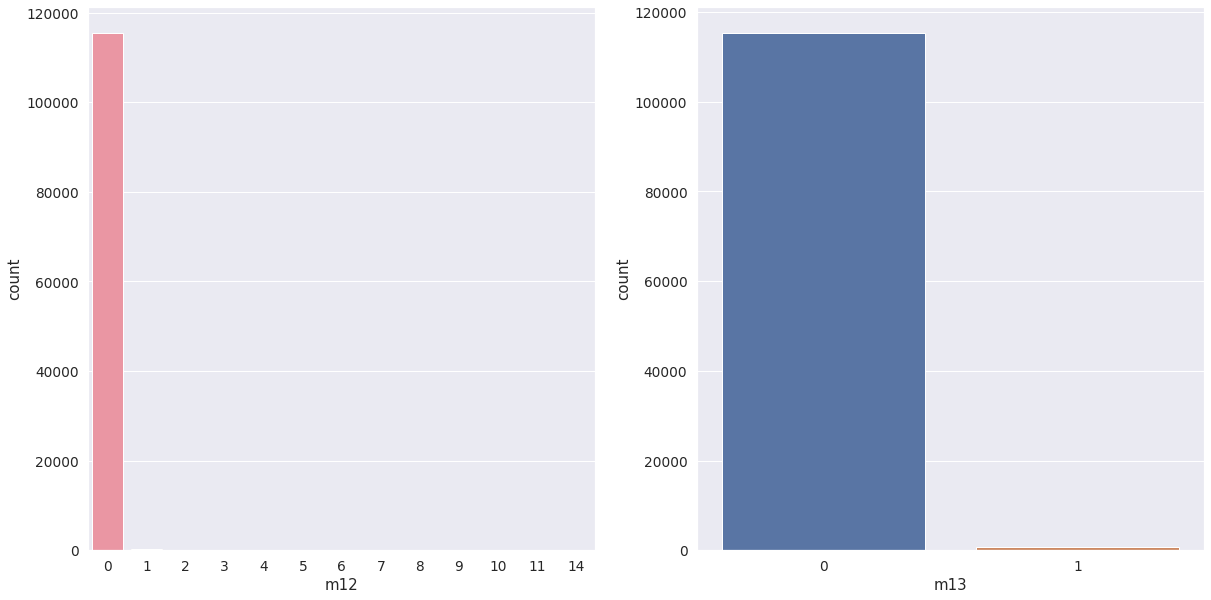

In [23]:
# m12  vs m13
#var = 'm12'
#data = pd.concat([train_data['m13'], train_data[var]], axis=1)
#f,ax = plt.subplots(figsize=(10,5))
#fig = sns.boxplot(x=var, y='m13', data=data)
#fig.axis(ymin=0, ymax=1);
fig = plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
sns.countplot(data=train_data, x='m12', ax=ax1);
ax2=fig.add_subplot(1,2,2)
sns.countplot(data=train_data, x='m13',ax=ax2);



In [31]:
from sklearn.preprocessing import OneHotEncoder

#for c in cat_cols:
#data_cat_enc=pd.get_dummies(data_all, column=cat_cols)
#onehot=OneHotEncoder(handle_unknown='ignore')
#    onehot.fit(list(data_all[c].values))
#    data_all[c]=onehot.transform(list(data_all[c].values))
#data_cat_enc=pd.get_dummies(data_all, column=cat_cols)
cat_cols=data_all.select_dtypes(include=['object'])
num_cols=data_all.select_dtypes(include=['int64', 'float64'])

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols=pd.DataFrame(OH_encoder.fit_transform(data_all[cat_cols]))

# put back index
OH_cols = data_all.index

#remove categorical cols from data (will replace with one hot encoding)
#num_cols
print("shape data_all: {}".format(data_all.shape))

ValueError: Must pass DataFrame with boolean values only

In [ ]:
from sklearn.model_selection import train_test_split


In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

cat_cols=train_data.select_dtypes(include=['object'])
num_cols=train_data.select_dtypes(include=['int64', 'float64'])

#one_hot_encode = OneHotEncoder(handle_unknown='ignore', sparse=False)
#data_enc=pd.DataFrame(one_hot_encode.fit_transform)
num_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

preprocessor= ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
])



In [41]:
from sklearn.model_selection import train_test_split
X = train_data.drop('m13', axis=1)
y = train_data['m13']

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    train_size = 0.7, 
                                                    test_size=0.3,
                                                   random_state = 1)

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [43]:
clf.fit(X_train, y_train)
print("model score: {:.3f}".format(clf.score(X_test, y_test)))

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed